In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../Data/fillna_big_df.csv')
data.Datetime = pd.to_datetime(data.Datetime)
data = data[data.Datetime < '2020-12-08']
data.head()

,Datetime,temp,desc,templow,icon,baro,wind,wd,hum,rain,...,intensite_greve,etat_barre_ce,q_ce,k_ce,etat_barre_lc,q_lc,k_lc,etat_barre_pv,q_pv,k_pv
0,2014-01-01 00:00:00,7.0,Low clouds.,6.0,17.0,1011.0,15.0,220.0,92.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01 01:00:00,6.0,Low clouds.,6.0,17.0,1011.0,15.0,220.0,92.0,0.0,...,0.9,3.0,4.0,0.00000,3.0,205.0,2.25945,3.0,486.0,6.17889
2,2014-01-01 02:00:00,6.0,Low clouds.,6.0,17.0,1011.0,15.0,220.0,92.0,0.0,...,0.9,3.0,21.0,0.10445,3.0,283.0,3.25111,3.0,571.0,6.66222
3,2014-01-01 03:00:00,6.0,Low clouds.,6.0,17.0,1011.0,15.0,220.0,92.0,0.0,...,0.9,3.0,417.0,6.12667,3.0,309.0,3.36000,3.0,532.0,5.56611
4,2014-01-01 04:00:00,6.0,Low clouds.,6.0,17.0,1011.0,15.0,220.0,92.0,0.0,...,0.9,3.0,1089.0,14.39890,3.0,277.0,3.01445,3.0,458.0,4.63444


# Feature engineering

In [3]:
df = copy.deepcopy(data)

## Time Feature 

In [4]:
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['quarter'] = df['Datetime'].dt.quarter
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['dayofmonth'] = df['Datetime'].dt.day
df['weekofyear'] = df['Datetime'].dt.weekofyear

<ipython-input-4-3b8f22692917>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Datetime'].dt.weekofyear


In [5]:
df[['hour','dayofweek','quarter','month','year', 'dayofyear','dayofmonth','weekofyear']]

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,2,1,1,2014,1,1,1
1,1,2,1,1,2014,1,1,1
2,2,2,1,1,2014,1,1,1
3,3,2,1,1,2014,1,1,1
4,4,2,1,1,2014,1,1,1
...,...,...,...,...,...,...,...,...
60787,19,0,4,12,2020,342,7,50
60788,20,0,4,12,2020,342,7,50
60789,21,0,4,12,2020,342,7,50
60790,22,0,4,12,2020,342,7,50


### Hours

In [6]:
df['sin_hour'] = np.sin((2*np.pi/24)*(df.hour))
df['cos_hour'] = np.cos((2*np.pi/24)*(df.hour))
df = df.drop(['hour'], axis=1)

### Dayofweek

In [7]:
df = pd.concat([df, pd.get_dummies(df['dayofweek'], prefix='dayofweek')], axis=1)
df = df.drop(['dayofweek'], axis=1)

### Quarter

In [8]:
df = pd.concat([df, pd.get_dummies(df['quarter'], prefix='quarter')], axis=1)
df = df.drop(['quarter'], axis=1)

### Month

In [9]:
df = pd.concat([df, pd.get_dummies(df['month'], prefix='month')], axis=1)
df = df.drop(['month'], axis=1)

### Dayofyear

In [10]:
df['sin_dayofyear'] = np.sin((2*np.pi/365.2425)*(df.dayofyear))
df['cos_dayofyear'] = np.cos((2*np.pi/365.2425)*(df.dayofyear))
df = df.drop(['dayofyear'], axis=1)

### Weekofyear

In [11]:
df['sin_weekofyear'] = np.sin((2*np.pi/53)*(df.weekofyear))
df['cos_weekofyear'] = np.cos((2*np.pi/53)*(df.weekofyear))
df = df.drop(['weekofyear'], axis=1)

### Dayofmonth

In [12]:
df = pd.concat([df, pd.get_dummies(df['dayofmonth'], prefix='dayofmonth')], axis=1)
df = df.drop(['dayofmonth'], axis=1)

## Weather

### Wind

In [13]:
# Convert to radian
wd_rad = df.wd*np.pi/180
df['Wx'] = df.wind * np.cos(wd_rad)
df['Wy'] = df.wind * np.sin(wd_rad)
df = df.drop(['wind', 'wd'], axis=1)

## Description

In [14]:
values = df.desc
counts = pd.value_counts(values)
mask = values.isin(counts[counts >= 30].index)
df = pd.concat([df, pd.get_dummies(values[mask], prefix='desc')], axis=1)
df = df.drop(['desc'], axis=1)

In [15]:
df.head()

,Datetime,temp,templow,icon,baro,hum,rain,fog,thunder,snow,...,desc_Mostly cloudy.,desc_No weather data available,desc_Overcast.,desc_Partly cloudy.,desc_Partly sunny.,desc_Passing clouds.,desc_Rain. Fog.,desc_Scattered clouds.,desc_Sunny.,desc_Thunderstorms. Fog.
0,2014-01-01 00:00:00,7.0,6.0,17.0,1011.0,92.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-01-01 01:00:00,6.0,6.0,17.0,1011.0,92.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-01-01 02:00:00,6.0,6.0,17.0,1011.0,92.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-01-01 03:00:00,6.0,6.0,17.0,1011.0,92.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-01-01 04:00:00,6.0,6.0,17.0,1011.0,92.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.columns

Index(['Datetime', 'temp', 'templow', 'icon', 'baro', 'hum', 'rain', 'fog',
       'thunder', 'snow',
       ...
       'desc_Mostly cloudy.', 'desc_No weather data available',
       'desc_Overcast.', 'desc_Partly cloudy.', 'desc_Partly sunny.',
       'desc_Passing clouds.', 'desc_Rain. Fog.', 'desc_Scattered clouds.',
       'desc_Sunny.', 'desc_Thunderstorms. Fog.'],
      dtype='object', length=133)

In [17]:
fill = ['desc_Broken clouds.',
       'desc_Chilly.', 'desc_Clear.', 'desc_Cloudy.', 'desc_Cool.',
       'desc_Dense fog.', 'desc_Drizzle. Broken clouds.', 'desc_Drizzle. Fog.',
       'desc_Drizzle. Low clouds.', 'desc_Drizzle. Mostly cloudy.',
       'desc_Fog.', 'desc_Haze.', 'desc_Ice fog.', 'desc_Light fog.',
       'desc_Light rain. Broken clouds.', 'desc_Light rain. Clear.',
       'desc_Light rain. Cloudy.', 'desc_Light rain. Fog.',
       'desc_Light rain. Low clouds.',
       'desc_Light rain. More clouds than sun.',
       'desc_Light rain. Mostly cloudy.', 'desc_Light rain. Overcast.',
       'desc_Light rain. Partly cloudy.', 'desc_Light rain. Partly sunny.',
       'desc_Light rain. Passing clouds.', 'desc_Light snow. Ice fog.',
       'desc_Low clouds.', 'desc_Mild.', 'desc_More clouds than sun.',
       'desc_Mostly cloudy.', 'desc_No weather data available',
       'desc_Overcast.', 'desc_Partly cloudy.', 'desc_Partly sunny.',
       'desc_Passing clouds.', 'desc_Rain. Fog.', 'desc_Scattered clouds.',
       'desc_Sunny.', 'desc_Thunderstorms. Fog.']
df.at[:, fill] = df[fill].fillna(value=np.float64(0))

## Coronavirus

In [18]:
print(df[df.confinement_1==1].Datetime.min())
print(df[df.confinement_1==1].Datetime.max())

2020-01-04 00:00:00
2020-12-04 23:00:00


In [19]:
print(df[df.confinement_2==1].Datetime.min())
print(df[df.confinement_2==1].Datetime.max())

2020-01-11 00:00:00
2020-11-28 00:00:00


In [20]:
print(df[df.confinement_3==1].Datetime.min())
print(df[df.confinement_3==1].Datetime.max())

2020-01-12 00:00:00
2020-11-30 23:00:00


In [21]:
df['confinement'] = np.float64(0)

In [22]:
df.at[(df.Datetime >= '2020-03-17') & (df.Datetime < '2020-05-11'), 'confinement'] = np.float64(-3)
df.at[(df.Datetime >= '2020-10-30') & (df.Datetime < '2020-11-28'), 'confinement'] = np.float64(-2)
df.at[(df.Datetime >= '2020-11-28') & (df.Datetime < '2020-12-15'), 'confinement'] = np.float64(-1)

<AxesSubplot:>

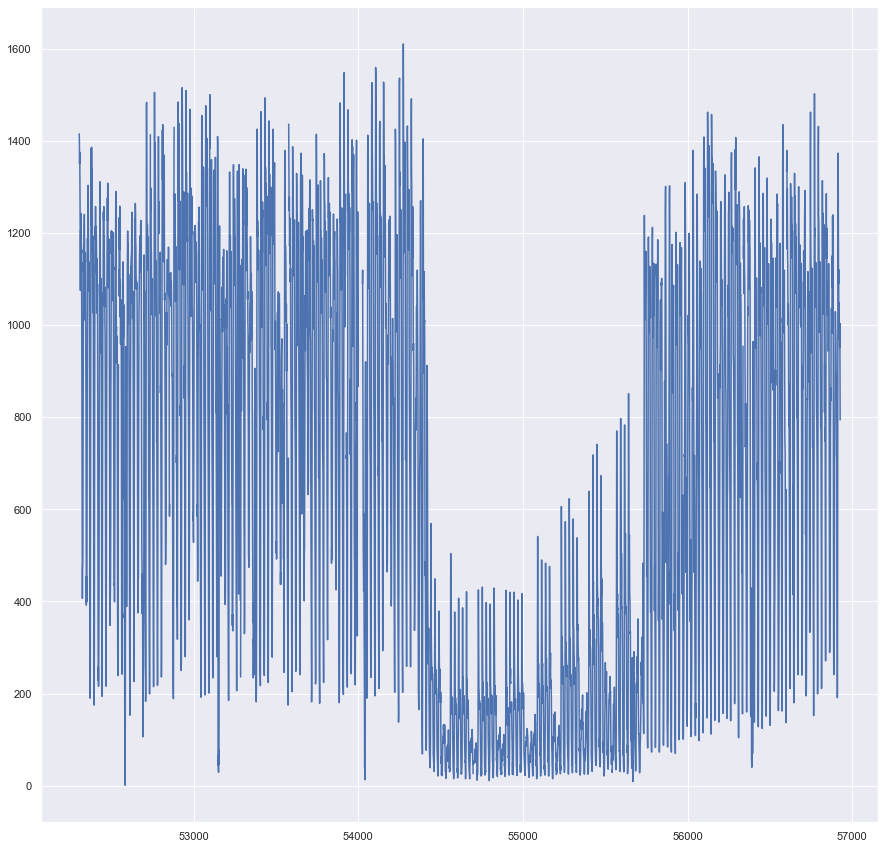

In [23]:
plt.figure(figsize=(15,15))
df[(df.Datetime >= '2019-12-20') & (df.Datetime < '2020-06-30')]['q_ce'].plot()

In [24]:
df = df.drop(['confinement_1', 'confinement_2', 'confinement_3'], axis=1)

<AxesSubplot:>

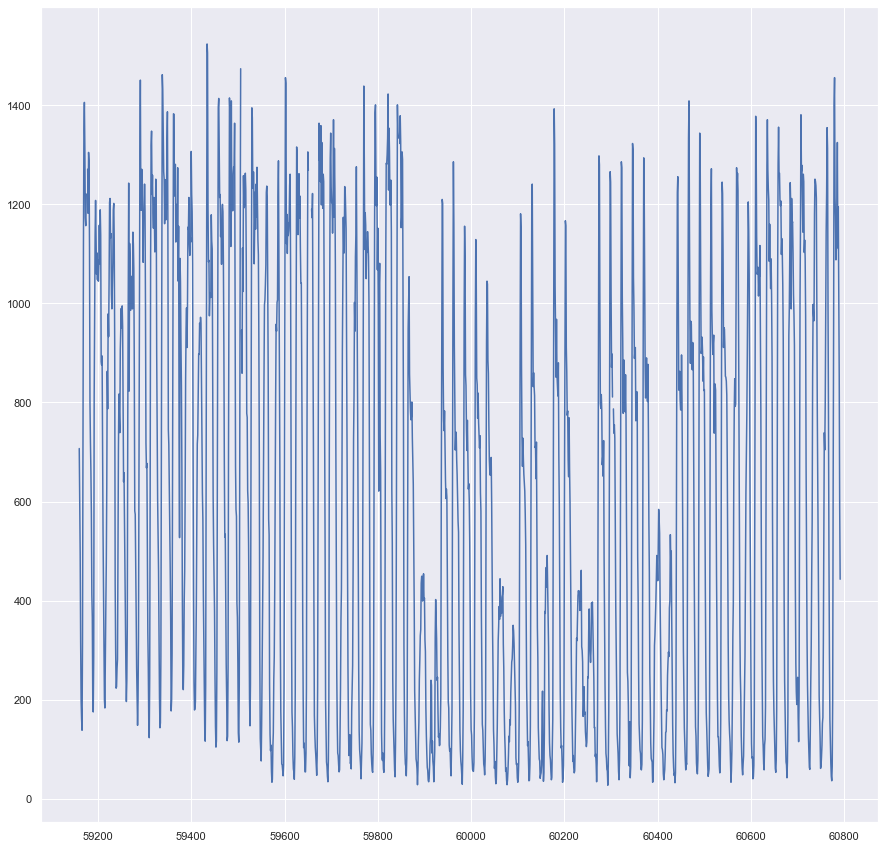

In [25]:
plt.figure(figsize=(15,15))
df[(df.Datetime >= '2020-10-01') & (df.Datetime < '2020-12-08')]['q_ce'].plot()

In [26]:
df.to_csv('../Notebooks/data.csv', index=False)

In [38]:
df.to_csv('../Notebooks/data_v0.csv', index=False)

# Data Selection

415 less than Xgboost, let's forgive that

https://stackoverflow.com/questions/18016495/get-subset-of-most-frequent-dummy-variables-in-pandas

https://github.com/JEddy92/TimeSeries_Seq2Seq/blob/master/notebooks/TS_Seq2Seq_Conv_Full_Exog.ipynb

https://www.tensorflow.org/tutorials/structured_data/time_series#performance_3